# Lista 1 - Regressão Baysiana
Aluno: Diego Freitas Holanda

Matricula: 411627

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regressão Linear Baysiana

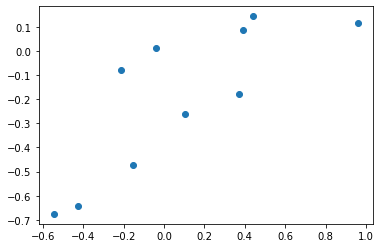

In [2]:
linear_dataset = np.genfromtxt('./linear_regression_data.csv', delimiter=',')
n = len(linear_dataset)
linear_x = linear_dataset[:, [0]]
linear_y = linear_dataset[:, [1]]
plt.scatter(linear_x, linear_y);

In [3]:
linear_features = np.c_[np.ones(n), linear_x]

## Implementação do modelo

In [4]:
class BaysianRegression:
    
    def __init__(self, sigma, sigma_w):
        self.sigma = sigma
        self.sigma_w = sigma_w
    
    def fit(self, X, y):
        I = np.eye(X.shape[1])
        sigma_sq = self.sigma**2
        sigma_w_sq = self.sigma_w**2
        self.mean = np.linalg.inv(X.T@X + (sigma_sq/sigma_w_sq) * I) @ X.T @ y
        self.var = sigma_w_sq*I - sigma_w_sq*np.linalg.inv(sigma_w_sq*X.T@X + sigma_sq*I) @ X.T @ X * sigma_w_sq
        
    def predict(self, X):
        return (X@self.mean).flatten(), np.diag(X@self.var@X.T + self.sigma**2)

In [5]:
model = BaysianRegression(.1, 1)

In [6]:
model.fit(linear_features, linear_y)

In [7]:
linear_mean, linear_var = model.predict(linear_features)

In [8]:
def plot_line(x, y, *args, **kwargs):
    x_axis = x.flatten()
    sorted_index = np.argsort(x_axis)
    x_axis = x_axis[sorted_index]
    y_axis = y[sorted_index]
    plt.plot(x_axis, y_axis, *args, **kwargs);
    

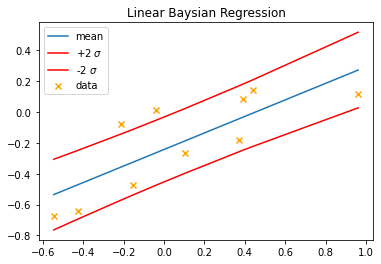

In [9]:
plus_std = linear_mean + 2 * np.sqrt(linear_var)
minus_std = linear_mean - 2 * np.sqrt(linear_var)
plt.scatter(linear_x, linear_y, marker='x', c='orange', label='data')
plot_line(linear_x, linear_mean, label='mean')
plot_line(linear_x, plus_std, 'r', label='+2 $\sigma$')
plot_line(linear_x, minus_std, 'r', label='-2 $\sigma$')
plt.title('Linear Baysian Regression')
plt.legend();

# Regressão Polinomial com modelo Baysiano

In [10]:
poly_dataset = np.genfromtxt('./polynomial_regression_data.csv', delimiter=',')

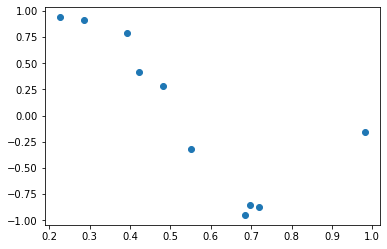

In [11]:
poly_x = poly_dataset[:, [0]]
poly_y = poly_dataset[:, [1]]
degree = 5
plt.scatter(poly_x, poly_y);

## Função de base para features polinomiais

In [12]:
def PolynomialFeatures(x, degree):
    return np.hstack([x**i for i in range(degree+1)])

In [13]:
poly_features = PolynomialFeatures(poly_x, degree)

In [14]:
model = BaysianRegression(.1, 1)

In [15]:
model.fit(poly_features, poly_y)

In [16]:
poly_mean, poly_var = model.predict(poly_features)

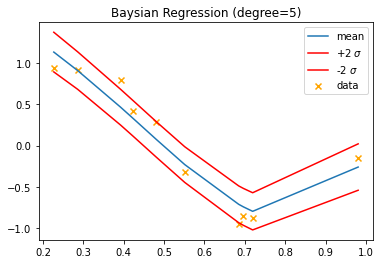

In [17]:
plus_std = poly_mean + 2 * np.sqrt(poly_var)
minus_std = poly_mean - 2 * np.sqrt(poly_var)
plt.scatter(poly_x, poly_y, marker='x', c='orange', label='data')
plot_line(poly_x, poly_mean, label='mean')
plot_line(poly_x, plus_std, 'r', label='+2 $\sigma$')
plot_line(poly_x, minus_std, 'r', label='-2 $\sigma$')
plt.title(f'Baysian Regression (degree={degree})')
plt.legend();